In [1]:
from IPython.display import display, Image, HTML

from nico_info import NicovideoInfomation
from utils import analyze_comments

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 動画 URL 入力
そのまま入力

In [ ]:
video_url = input()

ランキングを利用して入力

In [2]:
import requests
from bs4 import BeautifulSoup


# 全体，毎時
ranking_url = 'https://www.nicovideo.jp/ranking/genre/all?term=hour'

source = requests.get(ranking_url)
soup = BeautifulSoup(source.text, 'html.parser')

card = '''
    <div style='display: flex; height: 75px;'>
      <div style='width: 30px; height: 70px; margin: 20px 0px 0px 0px; padding: 0px 5px 0px 5px;'>{:03d}</div>
      <div style='width: 120px; height: 70px; padding: 0px 5px 0px 0px;'><img src={} width=120px/></div>
      <div style='width: 600px; height: 70px; position:relative;'>
        <div style='top: 0;'>{}</div>
        <div style='position: absolute; bottom: 0;'>▶️{} 💬{} 🤍{} 📁{}</div>
      </div>
    </div>
'''

urls, cards = [], []
for i, elem in enumerate(soup.find_all('div', class_='NC-VideoMediaObject')):
    title = elem.h2.text.lstrip()
    urls.append(elem.a.attrs['href'])
    thumbnail = elem.find('div', class_='NC-Thumbnail-image').attrs['data-background-image']
    view, comment, like, mylist, unknown = [counter.text for counter in elem.find_all('div', 'NC-VideoMetaCount')]
    cards.append(card.format(i+1, thumbnail, title, view, comment, like, mylist))

display(HTML(''.join(cards)))

idx = 0
while not (0 < idx < len(urls)+1):
    idx = int(input('index:'))-1

video_url = urls[idx]
display(HTML(cards[idx]))

index: 8


In [ ]:
idx = 0
while not (0 < idx < len(urls)+1):
    idx = int(input('index:'))-1

video_url = urls[idx]
display(HTML(cards[idx]))

---
CLASS `NicovideoInfomation(video_url: str = None, video_id: str = None)`

Parameters
- `video_url(str)` - 動画のURL
- `video_id(str)` - 動画のID
> どちらかだけでOK

`load_comments(forks, mode, hop_rate, check, **tqdm_kwargs)`

Parameters
- `forks(Union[int, list])` - コメントのタイプ (0: 一般，1: 投稿者，2: かんたん)
- `mode(str)` - 読み込み方 (once: 最新のみ，roughly: 粗めに，exactly: 正確に)
- `hop_rate(float)` - 過去コメントを読み込むためのパラメータ(粗め: 0~1 :正確)
- `check` - コメントをどれだけ読み込めたか表示する

`video_html(w, h)`

Parameters
- `h(int)` - 高さ
- `w(int)` - 幅

Returns
- `html(str)` - 動画埋め込み用の HTML
---

In [4]:
ninfo = NicovideoInfomation(video_url)
ninfo.load_comments([0, 2], hop_rate=.1, mode='exactly', check=True)
# display(HTML(ninfo.video_html()))

comments_df = ninfo.comments_df

  0%|          | 0/27497 [00:00<?, ?it/s]

0-Loading exactly:   0%|          | 0/5 [00:00<?, ?it/s]

2-Loading exactly:   0%|          | 0/2 [00:00<?, ?it/s]

=== total comments ===
user number: 531
comment number: 1279
comment / user: 2.41
------
acquisition rate: 97.41%

=== comments: 0 ===
user number: 460
comment number: 984
comment / user: 2.14
------
acquisition rate: 96.76%

=== comments: 2 ===
user number: 101
comment number: 295
comment / user: 2.92
------
acquisition rate: 99.66%


### コメントのプロット

In [5]:
remove_index = ['user_id', '184', 'position', 'size', 'color', 'command', 'score']
for fork in sorted(set(comments_df.index.str[0])):
    fork_df = comments_df[comments_df.index.str[0] == fork]
    display(fork_df.drop(remove_index, axis=1))

,comment,write_time,video_time
comment_id,,,
0-1,うぽつですー！,1.651144e+09,7.11
0-2,うぽつ,1.651144e+09,0.00
0-3,うぽつ,1.651144e+09,13.26
0-4,一人で沈んでてね♥,1.651144e+09,21.47
0-5,2個目,1.651144e+09,4.47
...,...,...,...
0-1013,嘘教えたり偏った知識を教えてトンズラするのが楽しそう,1.651170e+09,118.51
0-1014,オリンピックの時からこんなんだったよね,1.651171e+09,30.75
0-1015,国だから許されるんだよなぁ、民間だったら大問題よ,1.651171e+09,35.94


,comment,write_time,video_time
comment_id,,,
2-1,うぽつ,1.651144e+09,3.20
2-2,うぽつ,1.651144e+09,1.96
2-3,うぽつ,1.651144e+09,6.17
2-4,うぽつ,1.651144e+09,1.93
2-5,うぽつ,1.651144e+09,1.68
...,...,...,...
2-292,うぽつ,1.651168e+09,2.56
2-293,うぽつ,1.651169e+09,2.40
2-294,おつ,1.651169e+09,217.23


### WordCloud によるコメント解析

In [6]:
from wordcloud import WordCloud

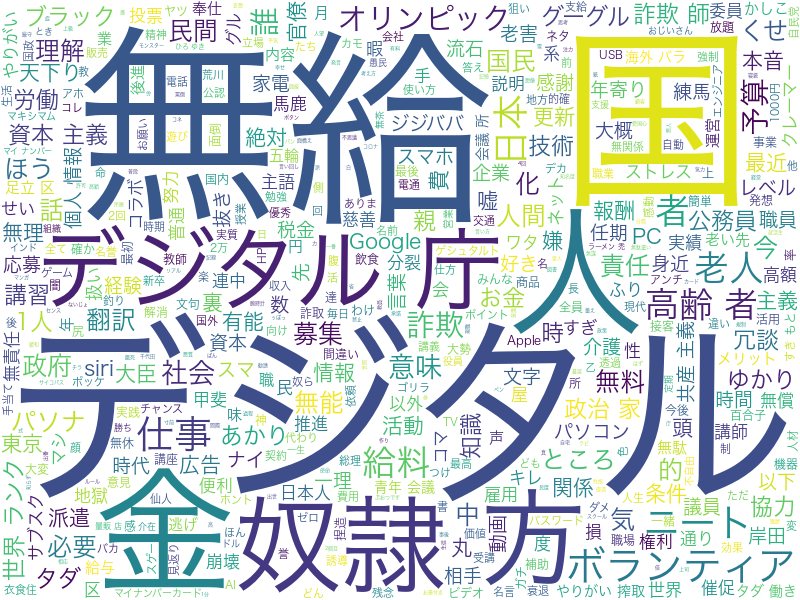

In [7]:
tgt_df = comments_df[comments_df.index.str[0] == '0']

tgt_comments = tgt_df.comment

# tokenizer には janome か sudachi が選択できる
results = analyze_comments(tgt_comments, tokenizer='janome')
text = ' '.join(results)

font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc'
wordcloud = WordCloud(
    background_color='white',
    font_path=font_path,
    width=800,
    height=600,
    max_words=500
).generate(text)

wordcloud.to_file('./wordcloud.png')
display(Image('./wordcloud.png'))

### コメント検索

In [9]:
search_word = input()
display(comments_df[comments_df.comment.str.contains(search_word)])

 ブラック


,comment,user_id,write_time,video_time,184,position,size,color,command,score
comment_id,,,,,,,,,,
0-31,教師はブラックなのは確か,mu_Fq-gKPa0jhiIC266q553BoUM,1.651144e+09,20.47,1,naka,medium,white,,0
0-108,ブラック通り越して闇,t--85gZdjc8Iyn3Pmnihe6qrqWo,1.651145e+09,29.53,1,naka,medium,white,,0
0-596,やっぱりブラック企業じゃねーか,54CoY0wyq6TXmDSGL51p3kZBsXc,1.651154e+09,34.57,1,naka,medium,white,,0
0-878,高齢者向けの講座ってブラックの方がまだマシなレベルの地獄だぞ,IJUwuyJf1BuXUcVszYwXCpdMtsE,1.651162e+09,36.03,1,naka,medium,white,,0
0-912,そら給料増えねえよな 国がブラック推奨してるんだから,vDWr35dA_Y_m_awqjeNHnA3Utu4,1.651163e+09,32.81,1,naka,medium,white,,0
0-1009,『無給で任期は1年、自動更新』 ええ・・・どこのブラック・・・国！？,3Anku42EveXGPl-Fu4xfh3yvdnU,1.651170e+09,27.07,1,naka,medium,white,,0


### ユーザー毎の投稿頻度

In [10]:
import matplotlib.pyplot as plt
from pprint import pprint

max: 17
min: 1
avg: 2.14
---
many post users:
{'_vPHUatEOxqS0vWUciL600MJAAg': 17,
 'g2wzU93e7lOdZj34PZXZTUQC9aI': 13,
 'ggrVMVFheBy74xu0PfCXnApoZ60': 16,
 'hvCk-pF4kGqEQ53AS6y4XtcIonM': 12,
 'jwKipk-KiCnv46w38bClzEcmXBo': 14}


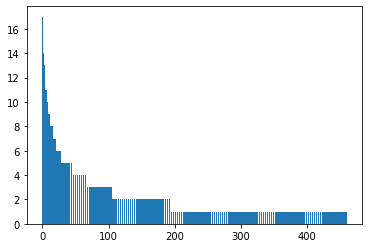

In [11]:
tgt_df = comments_df[comments_df.index.str[0] == '0']

uids = set(tgt_df.user_id)
hists = [(uid, len(tgt_df[tgt_df.user_id == uid])) for uid in uids]
hists.sort(key=lambda x: x[1], reverse=True)

left = range(len(hists))
height = [t[1] for t in hists]

print(f'max: {max(height)}')
print(f'min: {min(height)}')
print(f'avg: {sum(height)/len(height):.2f}')
print('---')
print('many post users:')
pprint({t[0]: t[1] for t in hists[:5]})

plt.bar(left, height)
plt.show()

### スコアの低いユーザーの投稿

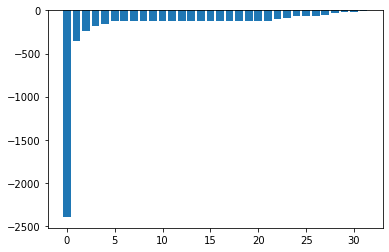

DgipRWFCc0bhuABXLhyiGWFqGjA : -2400.00
LUwfCclnBCT72U2XkvFAAc8OB7Y : -360.00
YBtzEi3ulIQAVC7WfEJiCbbAZes : -240.00
-YfgTbuZpwY3WsyR_kLpPvFz0UA : -185.00
-5TeGcW3fvxXB5_EZ2EzoJgpxuo : -160.00


In [12]:
tgt_df = comments_df[comments_df.index.str[0] == '0']
uids = set(tgt_df.user_id)
scores = [
    (uid, tgt_df[tgt_df.user_id == uid].score.values.mean())
    for uid in uids
]
scores = [t for t in scores if t[1] != 0.]
scores.sort(key=lambda x: x[1])

left = range(len(scores))
height = [t[1] for t in scores]

plt.bar(left, height)
plt.show()

remove_index = ['user_id', 'write_time', 'video_time', 'command', '184']
for score in scores[:5]:
    print(score[0], f': {score[1]:.2f}')
    # display(tgt_df[tgt_df.user_id == score[0]].drop(remove_index, axis=1))